# Project Credit Risk

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo

In [16]:
statlog_german_credit_data = fetch_ucirepo(id=144) 
credit = pd.concat([pd.DataFrame(statlog_german_credit_data.data.features), pd.DataFrame(statlog_german_credit_data.data.targets)], axis=1)
credit.columns = ['checking_status_acc','duration','credit_history','purpose','amount','savings','employment','installment_rate','marital_Gender','other_debtors','present_residence','property','age','other_installment_plans','housing','existing_credits','job','dependents','telephone','foreign_worker', 'credit_risk']
credit.head()

,checking_status_acc,duration,credit_history,purpose,amount,savings,employment,installment_rate,marital_Gender,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [17]:
credit.shape

(1000, 21)

In [18]:
print(credit.columns.tolist())

['checking_status_acc', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment', 'installment_rate', 'marital_Gender', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'credit_risk']


In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status_acc      1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   marital_Gender           1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [20]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [21]:
credit.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [23]:
credit['checking_status_acc'].value_counts()

checking_status_acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

In [24]:
credit['credit_history'].value_counts()

credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

In [26]:
pd.crosstab(credit.credit_history, credit.credit_risk)

credit_risk,1,2
credit_history,,
A30,15,25
A31,21,28
A32,361,169
A33,60,28
A34,243,50


In [27]:
pd.crosstab(credit.employment, credit.credit_risk)

credit_risk,1,2
employment,,
A71,39,23
A72,102,70
A73,235,104
A74,135,39
A75,189,64


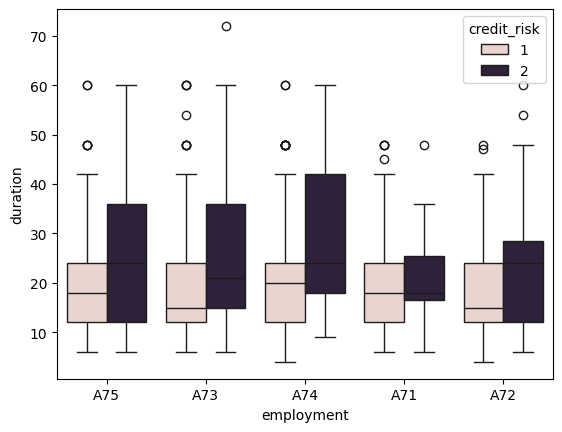

In [28]:
sns.boxplot(x='employment', y='duration', hue='credit_risk', data=credit)
plt.show()

In [30]:
credit.head()

,checking_status_acc,duration,credit_history,purpose,amount,savings,employment,installment_rate,marital_Gender,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [35]:
print(statlog_german_credit_data.metadata) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

### Weight of Evidence (WOE) e Information Value (IV)

In [75]:
for i in credit.drop(columns=['duration', 'amount', 'present_residence', 'age', 'existing_credits', 'dependents', 
                               'installment_rate', 'foreign_worker', 'credit_risk']).columns:
    
    df_woe_iv = (pd.crosstab(credit[i], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    
    iv_total = df_woe_iv['iv'].sum()
    
    print(f"Variável: {i}")
    print(f"IV Total: {iv_total:.4f}")
    print(df_woe_iv)
    print('-------------------------------------------------------------------------------------\n')

Variável: checking_status_acc
IV Total: 0.6660
credit_risk                 1         2       woe        iv
checking_status_acc                                        
A11                  0.198571  0.450000  0.818099  0.205693
A12                  0.234286  0.350000  0.401392  0.046447
A13                  0.070000  0.046667 -0.405465  0.009461
A14                  0.497143  0.153333 -1.176263  0.404410
-------------------------------------------------------------------------------------

Variável: credit_history
IV Total: 0.2932
credit_risk            1         2       woe        iv
credit_history                                        
A30             0.021429  0.083333  1.358123  0.084074
A31             0.030000  0.093333  1.134980  0.071882
A32             0.515714  0.563333  0.088319  0.004206
A33             0.085714  0.093333  0.085158  0.000649
A34             0.347143  0.166667 -0.733741  0.132423
-------------------------------------------------------------------------------

C:\Users\maylon\AppData\Local\Temp\ipykernel_26776\3457230777.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iv.append(df_woe_iv['iv'][0])
C:\Users\maylon\AppData\Local\Temp\ipykernel_26776\3457230777.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iv.append(df_woe_iv['iv'][0])
C:\Users\maylon\AppData\Local\Temp\ipykernel_26776\3457230777.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iv.append(df_woe_iv['iv'][0])
C

<Figure size 1000x1200 with 0 Axes>

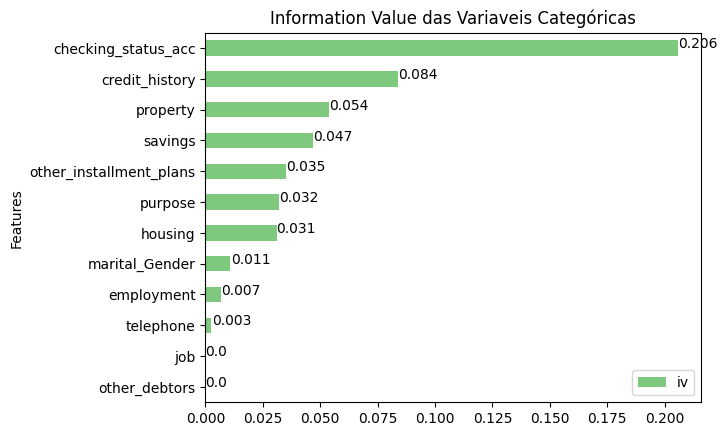

In [77]:
# Variaveis categoricas
columns_cat = credit.drop(columns=['duration', 'amount', 'present_residence', 'age', 'existing_credits', 'dependents', 
                               'installment_rate', 'foreign_worker', 'credit_risk']).columns
    
# Lista para o IV
iv = []

for i in columns_cat:
    df_woe_iv = (pd.crosstab(credit[i], credit['credit_risk'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[2] / dfx[1]))
                 .assign(iv=lambda dfx: (dfx[2] - dfx[1]) * dfx['woe']))
    iv.append(df_woe_iv['iv'][0])
    
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}).set_index('Features').sort_values(by = 'iv')

# plot
plt.figure(figsize=(10,12))
df_iv.plot(kind='barh', title='Information Value das Variaveis Categóricas', colormap='Accent')
for index, value in enumerate(list(round(df_iv['iv'], 3))):
    plt.text((value), index, str(value))
plt.legend(loc='lower right')
plt.show()

In [67]:
credit.savings.value_counts()

savings
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64